# Import Statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Reading Datasets

### I will start using only the dataset with padel descriptors, to get used to the process 

In [2]:
drugs = pd.read_csv("../../../data/fda_approved_datasets/fda_approved_with_descriptors/fda_approved_padel.csv")
print(drugs.shape)
drugs.head()

(1895, 1890)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# I will create a dataset with only the features from padel. This will make it
# easier to do the operations on the features

flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

drugs_features = drugs.drop(labels=flag_columns, axis=1)

In [4]:
print(drugs_features.shape)
drugs_features.head()

(1895, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Separating Explanatory and Response Variables

In [5]:
response_variable = drugs[flag_columns].drop(columns=["ROMol"])
response_variable.head()

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [6]:
explanatory_variables = drugs_features.iloc[:, 1:].copy()
explanatory_variables.head()

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,0.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,0.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,0.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,0.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dealing with Infinity Values

The dataset has values set as infinity. As this doesn't really make much sense for our calculations, and the number of occurances is small, I will replace them for NaN values.

In [7]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(explanatory_variables))

print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 30


In [8]:
explanatory_variables = explanatory_variables.replace([np.inf, -np.inf], np.nan)

In [9]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(explanatory_variables))

print(f"Number of Infinity Values (np.inf): {num_infinity.sum()}")

Number of Infinity Values (np.inf): 0


# Scale Features

We need to scale the features, so that they are on the same scale

In [10]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(explanatory_variables)

In [11]:
explanatory_variables_scaled = pd.DataFrame(scaled_data, columns=explanatory_variables.columns)
print(explanatory_variables_scaled.shape)
explanatory_variables_scaled.head()

(1895, 1874)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,-0.056478,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,-0.056478,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,-0.056478,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove Features With Variance Close to 0

In [12]:
def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [13]:
explanatory_variables_no_low_var = variance_threshold_selector(explanatory_variables_scaled)

In [14]:
print(explanatory_variables_no_low_var.shape)
explanatory_variables_no_low_var.head()

(1895, 1650)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,-0.056478,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,-0.056478,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,-0.056478,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that we now have 1137 features

# Filling NaN Values

We can see here that we have 500 molecules with NaN Values

In [15]:
explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)]

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.322380,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.35244,-1.004723,-0.87058,-0.935053,0.298179
4,0.052770,-0.261147,-1.312939,-1.759372,-1.322380,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0.129751,-0.272951,-1.130119,-1.752587,-1.322380,-1.323966,-1.670566,-1.632044,-1.586139,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,0.411337,-0.290752,-0.850294,-1.576556,-1.322380,-1.323966,-1.463234,-1.461765,-1.360816,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,-0.473222,-0.100781,-1.206631,-1.373556,-0.405204,-0.473038,-1.297369,-1.376626,-1.135493,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,-5.475213,8.373885,4.972300,5.338984,1.887737,1.796102,5.378721,5.945375,4.497590,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,-8.138039,18.015164,7.306500,6.596872,-1.322380,-1.323966,6.912978,6.881910,6.450392,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


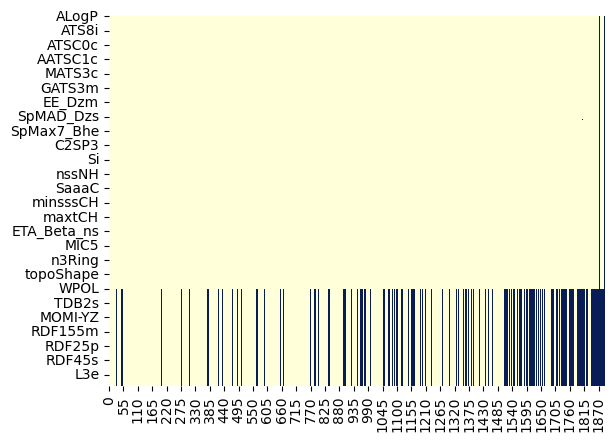

In [16]:
g = sns.heatmap(explanatory_variables_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

# Get Index of Molecules That Only Have NaN Values

I will get the index of all molecules that only have NaN values. In the end of the notebook, I will drop theses molecules. I won't drop them now, because it would give an error on the concatenation step.

In [17]:
def find_rows_with_only_nan(df):
    nan_rows = df[df.isna().all(axis=1)]
    nan_rows_index = nan_rows.index.tolist()
    return nan_rows_index

In [18]:
molecules_to_remove = find_rows_with_only_nan(explanatory_variables_no_low_var)

In [19]:
explanatory_variables_no_only_na = explanatory_variables_no_low_var.copy()

In [20]:
#explanatory_variables_no_only_na = explanatory_variables_no_low_var.drop(molecules_to_remove, axis=0)

In [21]:
#print(explanatory_variables_no_only_na.shape)
#explanatory_variables_no_only_na.head()

## KNN

Using the KNN method to fill the NaN values.

Using the K-nearest neighbors (KNN) method to replace NaN values in a dataset can be effective under certain conditions. Here are some scenarios in which using the KNN method for imputation can be appropriate:

1. **Continuous Numerical Data**: KNN imputation works well for continuous numerical data. It's particularly useful when the missing values are not easily predictable based on the other available features.

2. **Structural Relationships**: KNN imputation is suitable when there is a reasonable assumption that similar instances (data points) have similar values. If your data has a clear underlying structure, KNN can be beneficial.

3. **Small to Medium-sized Datasets**: KNN imputation can be computationally expensive, especially for large datasets. It's generally more suitable for small to medium-sized datasets where the computational cost is manageable.

4. **Multivariate Relationships**: If the missing values have complex relationships with multiple other features, KNN can capture these relationships better than simple imputation methods.

5. **No Assumption of Linearity**: KNN is a non-parametric method, meaning it doesn't make strong assumptions about the underlying distribution or relationships in the data. This can be advantageous when you're uncertain about the data's characteristics.

6. **Robust to Outliers**: KNN can handle outliers and skewed distributions relatively well because it relies on distances between data points rather than direct calculations involving the values.

However, there are also situations where KNN imputation might not be the best choice:

1. **High-Dimensional Data**: KNN suffers from the "curse of dimensionality," where the effectiveness of distance-based methods like KNN decreases as the number of dimensions increases. In high-dimensional spaces, distances between points become less meaningful.

2. **Sparse Data**: If your dataset has a high percentage of missing values, KNN imputation might struggle to find meaningful neighbors, and the imputed values may be unreliable.

3. **Computationally Intensive**: As mentioned earlier, KNN imputation can be computationally expensive, especially for larger datasets. For large datasets, alternative methods might be more efficient.

4. **Categorical Data**: KNN is originally designed for numerical data. While there are adaptations for categorical data (e.g., k-prototypes), KNN imputation might not be the most straightforward choice for handling missing values in categorical features.

5. **Imbalanced Datasets**: KNN might favor imputations from the majority class in imbalanced datasets.

Before using KNN imputation, it's a good practice to explore your data, understand the underlying relationships, and consider the characteristics of your dataset. It's often a good idea to compare KNN imputation with other imputation methods (such as mean, median, or more advanced techniques) to see which one performs best for your specific dataset and analysis goals.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [22]:
print(f"Number of Nan values: {explanatory_variables_no_only_na.isna().sum().sum()}")

Number of Nan values: 225823


In [23]:
selector = KNNImputer(n_neighbors=5)
explanatory_variables_fill_na = selector.fit_transform(explanatory_variables_no_only_na)

In [24]:
explanatory_variables_no_na = pd.DataFrame(explanatory_variables_fill_na, columns=explanatory_variables_no_only_na.columns)
print(explanatory_variables_no_na.shape)
explanatory_variables_no_na.head()

(1895, 1650)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,-0.056478,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,-0.056478,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,-0.056478,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,-1.094167,0.961243,0.459547,1.240002,-0.596465,-1.244256,-0.967105,-0.840822,-1.074944,0.618458


In [25]:
print(f"Number of Nan values: {explanatory_variables_no_na.isna().sum().sum()}")

Number of Nan values: 0


# Descale Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [26]:
# creating temporary dataset
drugs_scaler = explanatory_variables[explanatory_variables_no_na.columns].copy()
drugs_scaler.shape

(1895, 1650)

In [27]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [29]:
# descaling
explanatory_variables_descaled = descaler.inverse_transform(explanatory_variables_no_na)

In [30]:
explanatory_variables_descaled = pd.DataFrame(explanatory_variables_descaled, columns=explanatory_variables_no_na.columns)
print(explanatory_variables_descaled.shape)
explanatory_variables_descaled.head()

(1895, 1650)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,0.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,0.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,0.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,0.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,0.0,...,0.596491,0.293750,0.557749,0.529345,0.343465,3.965855,4.355573,9.667852,0.416585,1.430559


In [31]:
explanatory_variables_descaled[["ALogP", "ALogp2", "AMR", "apol"]]

,ALogP,ALogp2,AMR,apol
0,-0.469500,0.220430,11.199700,8.393965
1,-1.085200,1.177659,15.430500,9.557965
2,-1.088000,1.183744,12.507200,8.231172
3,-0.215700,0.046526,22.338100,12.187551
4,-0.589500,0.347510,11.393400,11.222758
...,...,...,...,...
1890,-10.075500,101.515700,255.696400,197.052612
1891,-0.680053,3.407116,62.426447,57.281853
1892,-14.644900,214.473096,346.425200,229.983230
1893,-0.680053,3.407116,62.426447,57.281853


In [32]:
drugs[["ALogP", "ALogp2", "AMR", "apol"]]

,ALogP,ALogp2,AMR,apol
0,-0.4695,0.220430,11.1997,8.393965
1,-1.0852,1.177659,15.4305,9.557965
2,-1.0880,1.183744,12.5072,8.231172
3,-0.2157,0.046526,22.3381,12.187551
4,-0.5895,0.347510,11.3934,11.222758
...,...,...,...,...
1890,-10.0755,101.515700,255.6964,197.052612
1891,NaN,NaN,NaN,NaN
1892,-14.6449,214.473096,346.4252,229.983230
1893,NaN,NaN,NaN,NaN


# Concat Response and Explanatory Variables

In [28]:
drugs_processed = pd.concat([response_variable, explanatory_variables_descaled], axis=1)

In [ ]:
print(drugs_processed.shape)
drugs_processed.head()

# Drop Molecules That Only Have NaN Values

In [ ]:
drugs_processed = drugs_processed.drop(molecules_to_remove, axis=0)

In [ ]:
print(drugs_processed.shape)
drugs_processed.head()

In [ ]:
g = sns.heatmap(drugs_processed.isna().transpose(), cmap="YlGnBu", cbar=False)

# Save Dataset

In [ ]:
drugs_processed.to_csv("../data/fda_padel_pre_processed_descriptors.csv", index=False)